# Therme source volumique d'échange avec une température extérieure

In [1]:
from trustutils import run  

run.introduction("A. Gerschenfeld, Y. Gorsse")

## Introduction 
 Validation made by : A. Gerschenfeld, Y. Gorsse



 Report generated 27/01/2022

### Description

Cette fiche teste le terme source Terme_Puissance_Thermique_Echange_Impose en VEF et PolyMAC. Ce terme est utilisé en pratique pour calculer un échangeur : la partir primaire est calculée en CFD poreuse, et le secondaire est imposé dans le jdd ou bien calculé en couplage. Le test consiste en une cavité au repos, à 30degres initialement. Le terme source d'échange est appliqué avec une température externe à 10degres. On s'attend à voir la puissance échangée tendre vers zéro avec le temps.

In [2]:
run.TRUST_parameters()

### TRUST parameters 
 * Version TRUST: 1.8.4
 * Binary used: /volatile/catA/ll258196/trust-code/exec/TRUST_mpi_opt (built on TRUST /volatile/catA/ll258196/trust-code/Validation/Rapports_automatiques/jupyter/Verification_codage/source_text/build)

In [3]:
from trustutils import run  
run.addCase("VEFPreP1B","jdd.data")  
run.addCase("PolyMAC","jdd.data")
run.addCase("VDF","jdd.data")   
run.printCases()
run.runCases()

### Test cases 
* VEFPreP1B/jdd.data : 
* PolyMAC/jdd.data : 
* VDF/jdd.data : 


Running **with Sserver**...
  => A total of 3 cases were (successfully) run in 331.3s.


## Resultats 
### Puissance échangée via le terme source

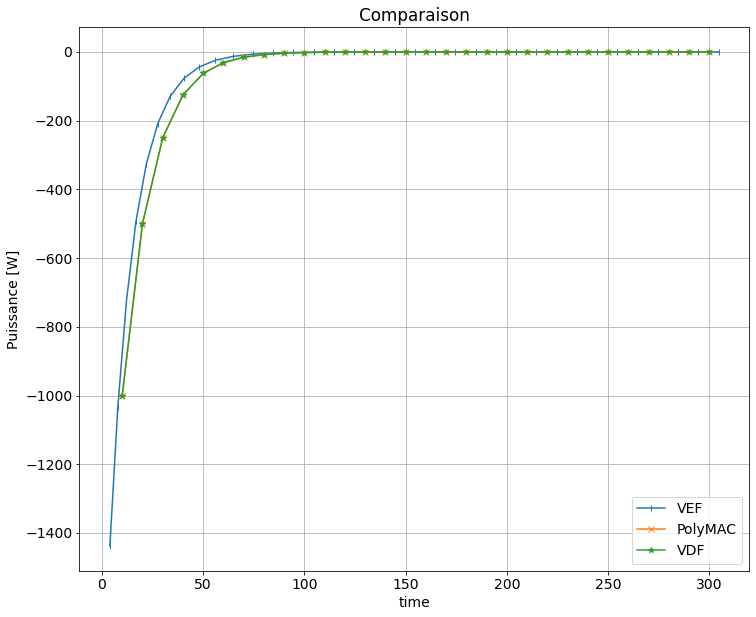

In [4]:
from trustutils import plot
import numpy as np

a = plot.Graph("Comparaison")
x = plot.loadText("VEFPreP1B/jdd_pb_Terme_Puissance_Thermique_Echange_Impose.out")
a.add(x[0],x[1],marker='-|',label="VEF")

x = plot.loadText("PolyMAC/jdd_pb_Terme_Puissance_Thermique_Echange_Impose.out")
a.add(x[0],x[1],marker='-x',label="PolyMAC")

x = plot.loadText("VDF/jdd_pb_Terme_Puissance_Thermique_Echange_Impose.out")
a.add(x[0],x[1],marker='-*',label="VDF")

a.label("time","Puissance [W]")
a.visu()